In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

insurance_data = pd.read_csv("insurance.csv")

print("Preview data")
print(insurance_data.head())
print("====================================================================")
print("Data description")
print(insurance_data.describe())
print("====================================================================")
insurance_data['sex'] = pd.Categorical(insurance_data['sex'], ['female', 'male'], ordered=True)
insurance_data['smoker'] = pd.Categorical(insurance_data['smoker'], ['yes', 'no'], ordered=True)
insurance_data['region'] = pd.Categorical(insurance_data['region'], ['southwest', 'southeast', 'northeast', 'northwest'], ordered=True)
print("Data types")
print(insurance_data.dtypes)

Preview data
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Data description
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Data types
age            int64
sex         category
bm

## Questions
1. Is one sex on average charged higher than the other?
2. Is age correlated to charges?
2. Is smoking a gender specific topic?
2. Are smokers charged higher on average than non-smokers?
5. Is region correlated to charges?
6. Conclusion

### Charges

Mean charges: 13270.42
Median charges: 9382.03


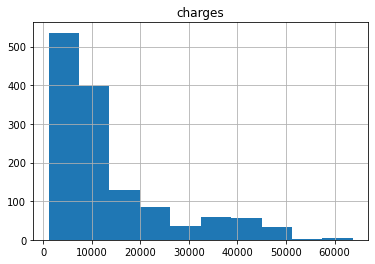

In [52]:
print("Mean charges:", round(insurance_data.charges.mean(), 2))
print("Median charges:", round(insurance_data.charges.median(), 2))

insurance_data.hist(column='charges')
plt.show()
plt.close()



The diagram is strongly left skewed. Many participants are in the low level area with their amount of charges.

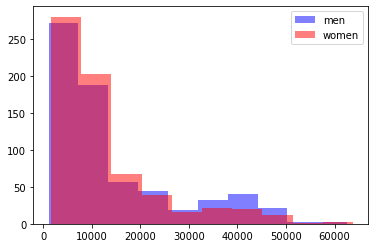

Median charges men: 9369.62 $.
Median charges women: 9412.96$.


In [44]:
chrgs_men = insurance_data.charges[insurance_data.sex == 'male']
chrgs_women = insurance_data.charges[insurance_data.sex == 'female']

plt.hist(chrgs_men, color="blue", label="men", alpha=0.5)
plt.hist(chrgs_women, color="red", label="women", alpha=0.5)
plt.legend()
plt.show()
plt.close()

print(f"Median charges men: {round(chrgs_men.median(), 2)} $.")
print(f"Median charges women: {round(chrgs_women.median(), 2)}$.")

There's a deviation in the amount of charges that men and women pay, there are more men in the higher area at arounf 40k.

### Age and charges

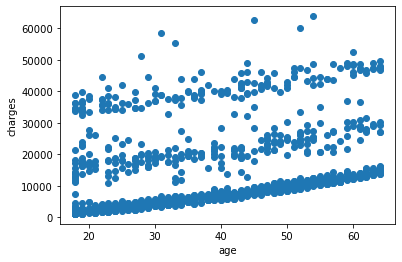

Covariance:
[[1.97401387e+02 5.08748023e+04]
 [5.08748023e+04 1.46652372e+08]]
Correlation:
0.29900819333064765
Chi2: 61548.000000000015


In [53]:
plt.scatter(x =insurance_data.age, y =insurance_data.charges)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
plt.close()

print('Covariance:')
cov_age_chrgs = np.cov(insurance_data.age, insurance_data.charges)
print(cov_age_chrgs)

print("====================================================================")

print('Correlation:')
corr_age_chrgs, p =pearsonr(insurance_data.age, insurance_data.charges)
print(corr_age_chrgs)


There is a correlation between age data. But what is significant is that the majority remains in the low level areas whereas other participants to already start at high charges with young age.

### Smokers & Gender

sex     female  male
smoker              
yes        115   159
no         547   517
sex       female      male
smoker                    
yes     0.085949  0.118834
no      0.408819  0.386398


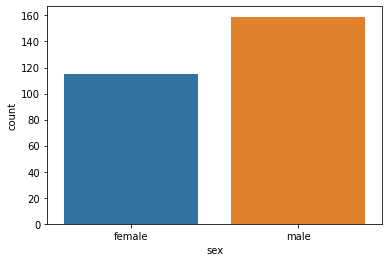

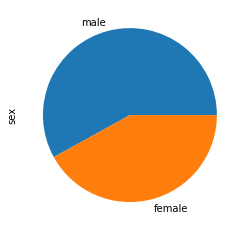

Men smoking: 23.52%.
Women smoking: 17.01%.


In [46]:
smoker_sex_freq = pd.crosstab(insurance_data.smoker, insurance_data.sex)
print(smoker_sex_freq)

smoker_sex_prop=smoker_sex_freq/len(insurance_data)
print(smoker_sex_prop)

smokers['sex'] = insurance_data.sex[insurance_data.smoker == 'yes']
sns.countplot(x='sex', data=smokers)
plt.show()
plt.close()

smokers.sex.value_counts().plot.pie()
plt.show()
plt.close()

smokers_perc_men = insurance_data.smoker[insurance_data.sex == 'male'].value_counts() / len(insurance_data[insurance_data.sex == 'male'])
print(f'Men smoking: {round(smokers_perc_men[1]*100, 2)}%.')

smokers_perc_women = insurance_data.smoker[insurance_data.sex == 'female'].value_counts() / len(insurance_data[insurance_data.sex == 'male'])
print(f'Women smoking: {round(smokers_perc_women[1]*100, 2)}%.')


In the pie chart you can see that among the smokers in the data men make up more than 50% (The sexes are equally distributed).

Among all men 23.52% are smokers, compared to that only 17% of women are smokers. 

## Charges and smokers

Mean charges smokers/non-smokers
smokers: 32050.23
non-smokers: 8434.27
Standard deviation
smokers: 11541.547175589121
non-smokers: 5993.781819194933
Median charges smokers/non-smokers
smokers: 34456.348450000005
non-smokers: 7345.4053
Difference between average charges of smokers and non smokers: 73.68%.


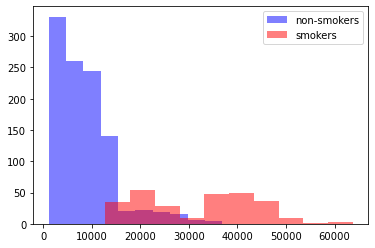

In [47]:
chrgs_smokers = insurance_data.charges[insurance_data.smoker == 'yes']
chrgs_non_smokers = insurance_data.charges[insurance_data.smoker == 'no']

print('Mean charges smokers/non-smokers')
print('smokers:', round(chrgs_smokers.mean(), 2))
print('non-smokers:', round(chrgs_non_smokers.mean(), 2))

print("======================================================")

print("Standard deviation")
print("smokers:", chrgs_smokers.std())
print("non-smokers:", chrgs_non_smokers.std())

print("======================================================")


print('Median charges smokers/non-smokers')
print('smokers:', chrgs_smokers.median())
print('non-smokers:', chrgs_non_smokers.median())

print("======================================================")

print(f'Difference between average charges of smokers and non smokers: \
{round((chrgs_smokers.mean() - chrgs_non_smokers.mean()) / chrgs_smokers.mean() * 100,2)}%.')

print("======================================================")

plt.hist(chrgs_non_smokers, color="blue", label="non-smokers", alpha=0.5)
plt.hist(chrgs_smokers, color="red", label="smokers", alpha=0.5)
plt.legend()
plt.show()
plt.close()

Here we can see that being a smoker or non-smoker does have a big impact on the average charges being faced. The difference between avergage charges of smokers and non smokers is 74,68%. 
All participants in the high paying area at around 40k and above are caused by smokers. There no smoking members in the group whose charges are in the area at 10k and below where the majority of non smokers is settled.

## Charges and regions

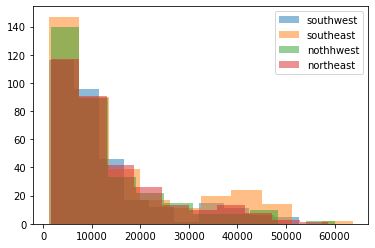

Sums charges per region
southwest: 4012754.65
southeast: 5363689.76
northwest: 4035712.0
northeast: 4343668.58


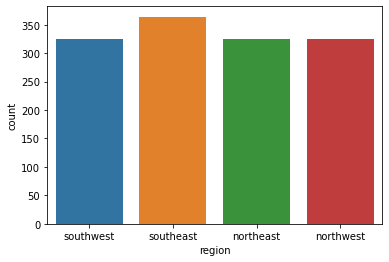

Mean charges per region
southwest: 12346.94
southeast: 14735.41
northwest: 12417.58
northeast: 13406.38


In [57]:
chrgs_sw = insurance_data.charges[insurance_data.region == 'southwest']
chrgs_se = insurance_data.charges[insurance_data.region == 'southeast']
chrgs_nw = insurance_data.charges[insurance_data.region == 'northwest']
chrgs_ne = insurance_data.charges[insurance_data.region == 'northeast']

plt.hist(chrgs_sw, label="southwest", alpha=0.5)
plt.hist(chrgs_se, label="southeast", alpha=0.5)
plt.hist(chrgs_nw, label="nothhwest", alpha=0.5)
plt.hist(chrgs_ne, label="northeast", alpha=0.5)
plt.legend()
plt.show()
plt.close()


print('Sums charges per region')
print('southwest:', round(sum(chrgs_sw),2))
print('southeast:', round(sum(chrgs_se),2))
print('northwest:', round(sum(chrgs_nw),2))
print('northeast:', round(sum(chrgs_ne),2))
sns.countplot(x='region', data=insurance_data)
plt.show()
plt.close()
print('Mean charges per region')
print('southwest:', round(chrgs_sw.mean(),2))
print('southeast:', round(chrgs_se.mean(),2))
print('northwest:', round(chrgs_nw.mean(),2))
print('northeast:', round(chrgs_ne.mean(),2))

In southeast region the total sum of charges is higher but there are also more participants from that region than from the others. Still average charges are there the highest as well. 

Maybe there is a correlation between smokers and charges in the region.

## Regions and smokers


Percentage of smokers per region:
southwest: 24.29%
southeast: 27.2%
northwest: 24.29%
northeast: 24.22%


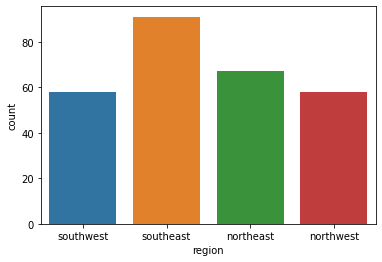

In [58]:
smokers_sw = len(insurance_data.smoker[insurance_data.region == 'southwest']) * 100 / len(insurance_data)  
smokers_se = len(insurance_data.smoker[insurance_data.region == 'southeast']) * 100 / len(insurance_data)
smokers_nw = len(insurance_data.smoker[insurance_data.region == 'northwest']) * 100 / len(insurance_data) 
smokers_ne = len(insurance_data.smoker[insurance_data.region == 'northeast']) * 100 / len(insurance_data)  

print("Percentage of smokers per region:")
print(f"southwest: {round(smokers_sw, 2)}%")
print(f"southeast: {round(smokers_se, 2)}%")
print(f"northwest: {round(smokers_nw, 2)}%")
print(f"northeast: {round(smokers_ne, 2)}%")


smokers['region'] = insurance_data.region[insurance_data.smoker == 'yes']
sns.countplot(x='region', data=smokers)
plt.show()
plt.close()


In southeast region there are relatively the most smokers. Since we saw that smoking affects the charges heavily this could contribute to the fact, that the average charges are also the highest in this region.

## BMI and charges

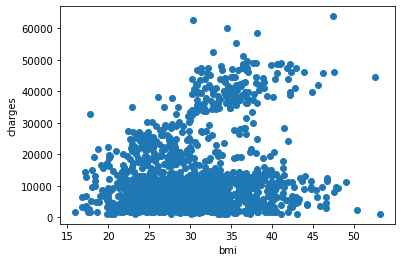

Covariance:
[[3.71878836e+01 1.46473044e+04]
 [1.46473044e+04 1.46652372e+08]]
Correlation:
0.19834096883362887
Chi2: 731886.0000000001


In [4]:
plt.scatter(x =insurance_data.bmi, y =insurance_data.charges)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
plt.close()

print('Covariance:')
cov_bmi_chrgs = np.cov(insurance_data.bmi, insurance_data.charges)
print(cov_bmi_chrgs)

print("====================================================================")

print('Correlation:')
corr_bmi_chrgs, p =pearsonr(insurance_data.bmi, insurance_data.charges)
print(corr_bmi_chrgs)

print("====================================================================")

## Conclusion

After checking several potential influencers on the insurance charges it got obvious that being a smoker or not has the highest impact on your charges. Growing age also increases the amount of charges but in a slow and steady way - age is not the relevant factor for the group of participants at the area of 40k for charges. When splitting up smokers and non smokers it becomes visible that smokers alone are responsible for the charges in the higher areas at 40k and not a single smoker of the group is settled in the area at 10k where the rest of the non smoking majority lays.

More men than women are included in this high paying group. But also, more men in the group are smoking than women, so probably it is more a question of smoking or not than a question of gender. 

Checking on the regions: In southeast region there are relatively the most smokers. Since we saw that smoking affects the charges heavily this could contribute to the fact, that the average charges are also the highest in this region.

Smoking is the main factor for driving up charges.